In [7]:
import os

TITANIC_PATH = os.path.join("datasets", "titanic")

In [8]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
from sklearn.model_selection import train_test_split

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [9]:
import pandas as pd
import seaborn as sns

def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

In [10]:
train_data = load_titanic_data("train.csv")
test_data = load_titanic_data("test.csv")

In [11]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size=0.2)
print(X_train.shape, y_train.shape)

NameError: name 'y' is not defined

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
train_data["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [12]:
train_data['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00     1
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

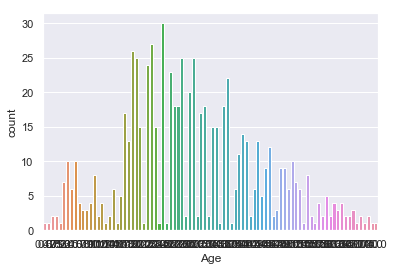

In [13]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Age", data=train_data)

In [14]:
train_data['Title'] = train_data['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

In [15]:
test_data['Title'] = test_data['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

In [16]:
train_data["Title"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Ms                1
Mme               1
the Countess      1
Sir               1
Capt              1
Don               1
Jonkheer          1
Lady              1
Name: Title, dtype: int64

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["Age", "SibSp", "Parch", "Fare"])),
        ("imputer", Imputer(strategy="median")),
    ])

C:\Users\piotr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\piotr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [20]:
num_pipeline.fit_transform(train_data)

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

In [19]:
num_pipeline.fit_transform(test_data)

array([[34.5   ,  0.    ,  0.    ,  7.8292],
       [47.    ,  1.    ,  0.    ,  7.    ],
       [62.    ,  0.    ,  0.    ,  9.6875],
       ...,
       [38.5   ,  0.    ,  0.    ,  7.25  ],
       [27.    ,  0.    ,  0.    ,  8.05  ],
       [27.    ,  1.    ,  1.    , 22.3583]])

In [31]:
# Inspired from stackoverflow.com/questions/25239958
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [32]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["Pclass", "Sex", "Embarked"])),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

In [34]:
cat_pipeline.fit_transform(train_data)

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [35]:
cat_pipeline.fit_transform(test_data)

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [36]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [37]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train

array([[22.,  1.,  0., ...,  0.,  0.,  1.],
       [38.,  1.,  0., ...,  1.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [28.,  1.,  2., ...,  0.,  0.,  1.],
       [26.,  0.,  0., ...,  1.,  0.,  0.],
       [32.,  0.,  0., ...,  0.,  1.,  0.]])

In [38]:
Y_test = preprocess_pipeline.fit_transform(test_data)
Y_test

array([[34.5,  0. ,  0. , ...,  0. ,  1. ,  0. ],
       [47. ,  1. ,  0. , ...,  0. ,  0. ,  1. ],
       [62. ,  0. ,  0. , ...,  0. ,  1. ,  0. ],
       ...,
       [38.5,  0. ,  0. , ...,  0. ,  0. ,  1. ],
       [27. ,  0. ,  0. , ...,  0. ,  0. ,  1. ],
       [27. ,  1. ,  1. , ...,  1. ,  0. ,  0. ]])

In [39]:
y_train = train_data["Survived"]

In [40]:
import tensorflow as tf

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300,100], n_classes=10, feature_columns=feature_cols)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf)
dnn_clf.fit(X_train, y_train, batch_size = 10, steps = 4000)

Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please feed input to tf.data to support dask.
Instructions for updating:
Please access pandas data directly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please convert numpy dtypes explicitly.
Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001666BCC9390>, '_master':

INFO:tensorflow:loss = 0.5437096, step = 1801 (0.263 sec)
INFO:tensorflow:global_step/sec: 392.383
INFO:tensorflow:loss = 0.50065124, step = 1901 (0.256 sec)
INFO:tensorflow:global_step/sec: 358.629
INFO:tensorflow:loss = 0.7038335, step = 2001 (0.278 sec)
INFO:tensorflow:global_step/sec: 314.645
INFO:tensorflow:loss = 0.55644715, step = 2101 (0.318 sec)
INFO:tensorflow:global_step/sec: 397.056
INFO:tensorflow:loss = 0.46226636, step = 2201 (0.252 sec)
INFO:tensorflow:global_step/sec: 369.217
INFO:tensorflow:loss = 0.36126727, step = 2301 (0.276 sec)
INFO:tensorflow:global_step/sec: 357.347
INFO:tensorflow:loss = 0.33083242, step = 2401 (0.275 sec)
INFO:tensorflow:global_step/sec: 420.408
INFO:tensorflow:loss = 0.2781226, step = 2501 (0.244 sec)
INFO:tensorflow:global_step/sec: 427.598
INFO:tensorflow:loss = 0.35632482, step = 2601 (0.234 sec)
INFO:tensorflow:global_step/sec: 413.459
INFO:tensorflow:loss = 0.66685796, step = 2701 (0.236 sec)
INFO:tensorflow:global_step/sec: 413.46
INFO

SKCompat()

In [41]:
from sklearn.metrics import accuracy_score
y_pred = dnn_clf.predict(Y_test)
accuracy_score(y_test, y_pred['classes'])

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\piotr\AppData\Local\Temp\tmp17yedo1j\model.ckpt-4000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


NameError: name 'y_test' is not defined

### Plant TensorFlow

In [42]:
import tensorflow as tf

n_inputs = 12
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 2

In [43]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")
training = tf.placeholder_with_default(False, shape=(), name = "traning")
dropout_rate = 0.5
X_drop = tf.layers.dropout(X, dropout_rate,training=training)

In [44]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        
        
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [45]:
with tf.name_scope("dnn"):
    #hidden1 = neuron_layer(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden1 = tf.layers.dense(X_drop, n_hidden1, activation=tf.nn.relu, name="hidden1")
    hidden1_drop = tf.layers.dropout(hidden1,dropout_rate, training=training)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    
    logits = neuron_layer(hidden2, n_outputs, name="outputs")



In [46]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [47]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [48]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [49]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [53]:
n_epochs = 400
batch_size = 10

In [54]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [55]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_train, y: y_train})
        print(epoch, "Batch accuracy:", acc_batch, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.6 Val accuracy: 0.68013465
1 Batch accuracy: 0.7 Val accuracy: 0.687991
2 Batch accuracy: 0.6 Val accuracy: 0.681257
3 Batch accuracy: 0.9 Val accuracy: 0.6891134
4 Batch accuracy: 0.9 Val accuracy: 0.681257
5 Batch accuracy: 0.8 Val accuracy: 0.6902357
6 Batch accuracy: 0.9 Val accuracy: 0.6857464
7 Batch accuracy: 0.7 Val accuracy: 0.70258135
8 Batch accuracy: 0.6 Val accuracy: 0.7115601
9 Batch accuracy: 0.6 Val accuracy: 0.69135803
10 Batch accuracy: 0.7 Val accuracy: 0.72166103
11 Batch accuracy: 0.6 Val accuracy: 0.7171717
12 Batch accuracy: 0.9 Val accuracy: 0.7295174
13 Batch accuracy: 0.7 Val accuracy: 0.6936027
14 Batch accuracy: 0.8 Val accuracy: 0.7037037
15 Batch accuracy: 0.7 Val accuracy: 0.61616164
16 Batch accuracy: 0.9 Val accuracy: 0.66105497
17 Batch accuracy: 0.8 Val accuracy: 0.718294
18 Batch accuracy: 0.8 Val accuracy: 0.7194164
19 Batch accuracy: 0.8 Val accuracy: 0.684624
20 Batch accuracy: 0.8 Val accuracy: 0.74747473
21 Batch accuracy: 0.

172 Batch accuracy: 0.9 Val accuracy: 0.8103255
173 Batch accuracy: 0.7 Val accuracy: 0.81257015
174 Batch accuracy: 1.0 Val accuracy: 0.7923681
175 Batch accuracy: 0.9 Val accuracy: 0.78338945
176 Batch accuracy: 1.0 Val accuracy: 0.8136925
177 Batch accuracy: 0.8 Val accuracy: 0.7856341
178 Batch accuracy: 0.8 Val accuracy: 0.82828283
179 Batch accuracy: 0.9 Val accuracy: 0.81705946
180 Batch accuracy: 0.8 Val accuracy: 0.79012346
181 Batch accuracy: 0.8 Val accuracy: 0.79349047
182 Batch accuracy: 1.0 Val accuracy: 0.80583614
183 Batch accuracy: 0.8 Val accuracy: 0.7979798
184 Batch accuracy: 0.9 Val accuracy: 0.81593716
185 Batch accuracy: 0.8 Val accuracy: 0.82828283
186 Batch accuracy: 0.7 Val accuracy: 0.8271605
187 Batch accuracy: 0.9 Val accuracy: 0.79349047
188 Batch accuracy: 1.0 Val accuracy: 0.8215488
189 Batch accuracy: 0.8 Val accuracy: 0.79461277
190 Batch accuracy: 0.9 Val accuracy: 0.80583614
191 Batch accuracy: 0.8 Val accuracy: 0.8237935
192 Batch accuracy: 0.7 Val 

342 Batch accuracy: 1.0 Val accuracy: 0.7441077
343 Batch accuracy: 1.0 Val accuracy: 0.8271605
344 Batch accuracy: 0.7 Val accuracy: 0.8215488
345 Batch accuracy: 0.7 Val accuracy: 0.7037037
346 Batch accuracy: 0.9 Val accuracy: 0.8148148
347 Batch accuracy: 1.0 Val accuracy: 0.8305275
348 Batch accuracy: 0.9 Val accuracy: 0.8294052
349 Batch accuracy: 0.9 Val accuracy: 0.8136925
350 Batch accuracy: 0.8 Val accuracy: 0.82828283
351 Batch accuracy: 0.9 Val accuracy: 0.7979798
352 Batch accuracy: 0.9 Val accuracy: 0.8035915
353 Batch accuracy: 1.0 Val accuracy: 0.8260382
354 Batch accuracy: 0.9 Val accuracy: 0.8080808
355 Batch accuracy: 0.7 Val accuracy: 0.8294052
356 Batch accuracy: 1.0 Val accuracy: 0.83613914
357 Batch accuracy: 0.8 Val accuracy: 0.8271605
358 Batch accuracy: 1.0 Val accuracy: 0.81257015
359 Batch accuracy: 0.8 Val accuracy: 0.8114478
360 Batch accuracy: 1.0 Val accuracy: 0.80246913
361 Batch accuracy: 0.7 Val accuracy: 0.80920315
362 Batch accuracy: 0.9 Val accurac